In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spiral.csv')

In [3]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


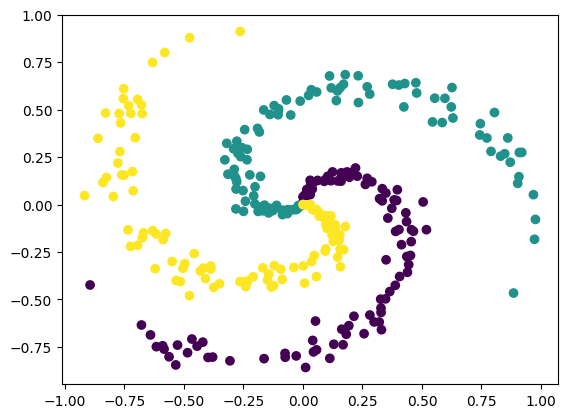

In [4]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

In [6]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [8]:
d = X.shape[1] # no of features
n = len(np.unique(y)) # no of classes
m = X.shape[0]
print(d,n,m)

2 3 300


In [11]:
w = 0.01 * np.random.randn(d,n) # weight matrix d * n (features * no of classes)
b = np.zeros((1,n)) # bias matrix (1 * features)

In [12]:
z = np.dot(X,w)+b
print(z.shape)

(300, 3)


In [15]:
exp_z = np.exp(z)
probs = exp_z/np.sum(exp_z,axis=1,keepdims=True)
print(probs.shape)

(300, 3)


In [19]:
def cross_entropy_loss(y,probs):
    m = y.shape[0]
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
cross_entropy_loss(y,probs)

1.0999317017538066

In [32]:
dz = probs
dz[range(m),y] -= 1

In [33]:
dw = np.dot(X.T,dz)
dw

array([[-31.13672622, -44.6089241 ,  89.70639259],
       [ 84.81901544, -86.74751198,  18.09788349]])

In [34]:
b

array([[0., 0., 0.]])

In [35]:
db = np.sum(dz,axis=0,keepdims=True)
db

array([[-200.0364091 , -199.97743079, -199.98616011]])

In [40]:
max_iter = 5000
lr = 0.001
d = X.shape[1] # no of features
n = len(np.unique(y)) # no of classes 
m = X.shape[0] # no of data points
loss_history = []
w = 0.01 * np.random.randn(d,n) # weight matrix random initialized
b = np.zeros((1,n)) # bias matrix initialize it to zero 

for i in range(max_iter):
    # forward propogation
    z = np.dot(X,w)+b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z,axis=1,keepdims=True)
    error = -np.log(probs[range(m),y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 1000 == 0:
        print(f"iteration: {i}, loss: {loss}")
    
    # backward propogation
    dz = probs
    dz[range(m),y] -= 1
    dw = np.dot(X.T,dz)
    db = np.sum(dz,axis=0,keepdims=True)
    
    w -= lr*dw
    b -= lr*db
    

iteration: 0, loss: 1.0987368815692529
iteration: 1000, loss: 0.7402176417883398
iteration: 2000, loss: 0.7401826052466968
iteration: 3000, loss: 0.7401825656183886
iteration: 4000, loss: 0.740182565571904


In [41]:
def predict(X):
    z = np.dot(X,w)+b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)
print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

Training Accuracy 0.5266666666666666


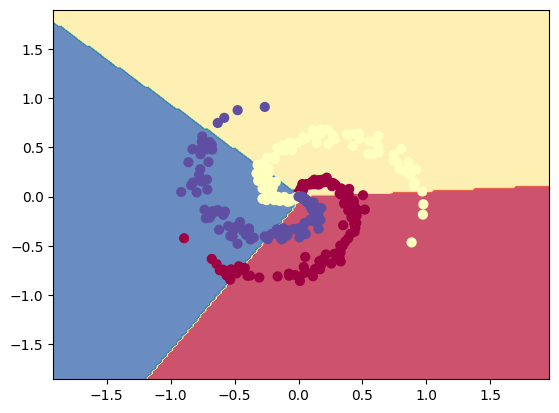

In [42]:
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) 
y_hat = y_hat.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()